In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

# Courbes des hypothèses

## Un seul polariseur

In [2]:
# Lumière polarisée dans l'air en x a theta = 0 => cos(theta) = 1
E0 = 1
eta = 377

theta = np.linspace(0, math.radians(115), 1000)
E = E0*np.cos(theta)

P0 = np.abs(E0)**2/(2*eta)
P = np.abs(E)**2/(2*eta)
P_class_2pol = P/P0

## Deux polariseurs

In [3]:
E2 = E*np.cos(theta)
P = np.abs(E2)**2/(2*eta)
P_class_3pol = P/P0

# Données expérimentales

In [4]:
import csv

# Replace 'your_file.csv' with the path to your CSV file
filename = 'data.csv'

# Initialize empty lists for each column
theta, p2pol, p3pol = [], [], []

# Open and read the CSV file
with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # Append each value to its respective list
        theta.append(float(row[0]))
        p2pol.append(float(row[1]))
        p3pol.append(float(row[2]))

In [5]:
# Matrice de polarisation avec rotation
def rot(theta):
    return np.array([[np.cos(theta), np.sin(theta)],
                    [-np.sin(theta), np.cos(theta)]])

def polariseur(theta):
    return rot(-theta)@np.array([[1 ,0], [0, 0]])@rot(theta)

## Un seul polariseur

In [6]:
P_vect = []

for angle in theta:
    J = polariseur(angle)@np.array([1,0])
    P = np.linalg.norm(J)**2/(2*eta)
    P_vect.append(P)
P0 = np.linalg.norm(np.array([1,0]))**2/(2*eta)

P_jones_2pol = P_vect/P0

## Deux polariseurs

In [7]:
P2_vect = []

for angle in theta:
    J = polariseur(angle)@np.array([1,0])
    J2 = polariseur(2*angle)@J
    P2 = np.linalg.norm(J2)**2/(2*eta)
    P2_vect.append(P2)
P0 = np.linalg.norm(np.array([1,0]))**2/(2*eta)

P_jones_3pol = P2_vect/P0

# Graphiques

In [47]:
# Error values
coeff_trans_2 = np.array(p2pol) / np.max(p2pol)
theta_error_2 = 1
p2pol_error = coeff_trans_2*np.sqrt((0.001/np.array(p2pol))**2 + (0.001/np.max(p2pol))**2)

coeff_trans_3 = np.array(p3pol) / np.max(p3pol)
theta_error_3 = 3/2
p3pol_error = coeff_trans_3*np.sqrt((0.001/np.array(p3pol))**2 + (0.001/np.max(p3pol))**2)

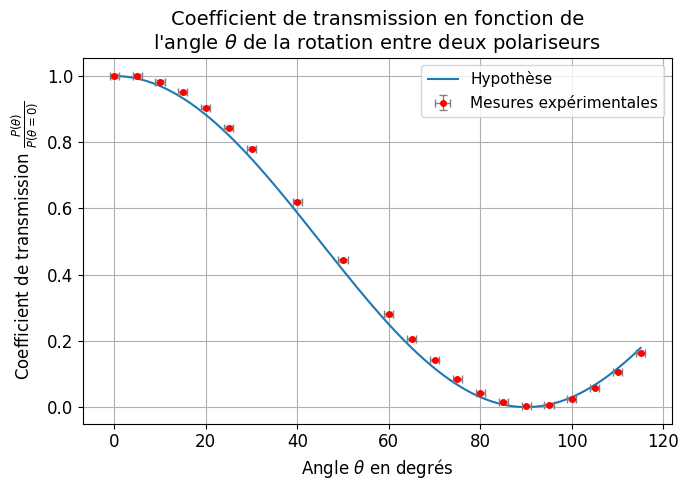

In [48]:
plt.figure(figsize=[7,5])
thetadeg = np.linspace(0,115,1000)
plt.plot(thetadeg, P_class_2pol, label='Hypothèse')
# Scatter plot for measured data
#plt.scatter(theta, p2pol/np.max(p2pol), color='red', marker='x', label='Mesures expérimentales')



# Scatter plot for measured data with error bars
plt.errorbar(theta, coeff_trans_2,
             xerr=theta_error_2, yerr=p2pol_error,
             fmt='o ', color='red', ecolor='gray',markersize=4 , elinewidth=1, capsize=3, label='Mesures expérimentales')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Angle $\\theta$ en degrés", fontsize=12)
plt.ylabel("Coefficient de transmission $\\frac{P(\\theta)}{P(\\theta=0)}$", fontsize=12)
plt.grid()
plt.title("Coefficient de transmission en fonction de\nl'angle $\\theta$ de la rotation entre deux polariseurs", fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.savefig("viz_deux_pol.png")
plt.show()

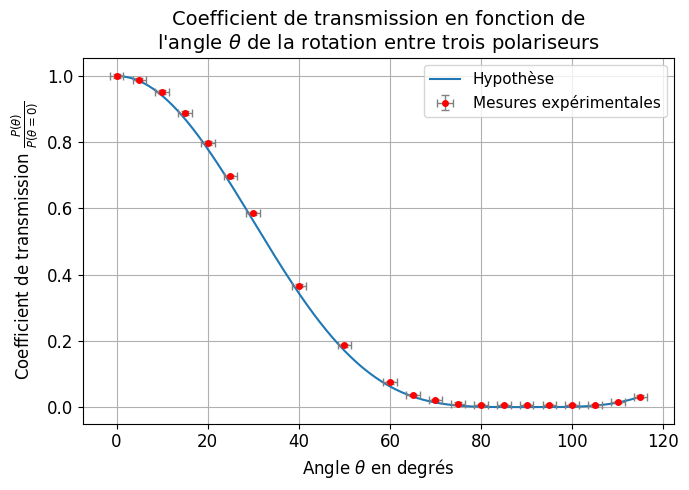

In [49]:
plt.figure(figsize=[7,5])
thetadeg = np.linspace(0,115,1000)
plt.plot(thetadeg, P_class_3pol, label='Hypothèse')
# Scatter plot for measured data
#plt.scatter(theta, p2pol/np.max(p2pol), color='red', marker='x', label='Mesures expérimentales')



# Scatter plot for measured data with error bars
plt.errorbar(theta, coeff_trans_3,
             xerr=theta_error_3, yerr=p2pol_error,
             fmt='o ', color='red', ecolor='gray',markersize=4 , elinewidth=1, capsize=3, label='Mesures expérimentales')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Angle $\\theta$ en degrés", fontsize=12)
plt.ylabel("Coefficient de transmission $\\frac{P(\\theta)}{P(\\theta=0)}$", fontsize=12)
plt.grid()
plt.title("Coefficient de transmission en fonction de\nl'angle $\\theta$ de la rotation entre trois polariseurs", fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.savefig("viz_trois_pol.png")
plt.show()

In [54]:
np.max(p2pol_error)

np.float64(0.00501494171054289)

In [55]:
np.max(p3pol_error)

np.float64(0.0075224125658143355)

In [ ]:
C